### Imports and Declarations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

### Reading Audio Files

In [3]:
audio_files = glob('./004/*_31.wav')
audio_files

['./004/114004_31.wav']

In [4]:
# Play audio file
ipd.Audio(audio_files[0])

In [5]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 9.8492441e-05  2.1705775e-04  2.5070208e-04  2.1293026e-04
  2.2148997e-04  1.6813836e-04  1.6917728e-04  2.6510091e-04
  1.4091030e-04 -6.1706894e-05]
shape y: (146765,)
sr: 22050


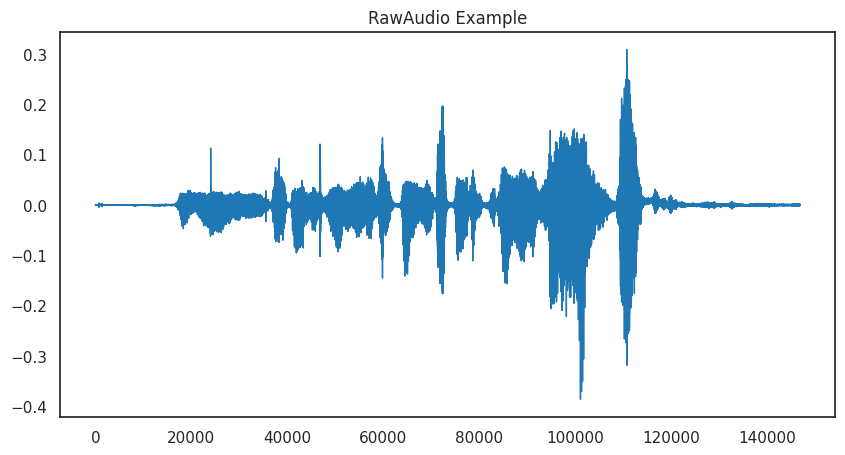

In [6]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title='RawAudio Example', color=color_pal[0])
plt.show()

### Spectogram

In [7]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 287)

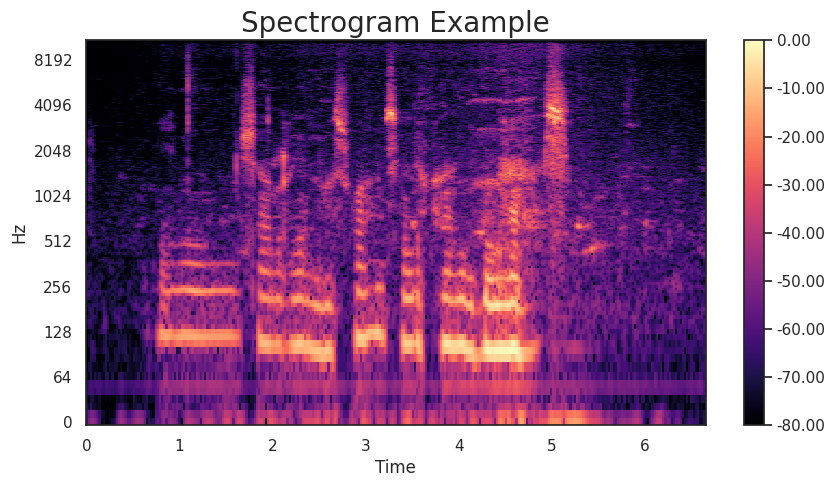

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

### Mel Spectogram

In [9]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

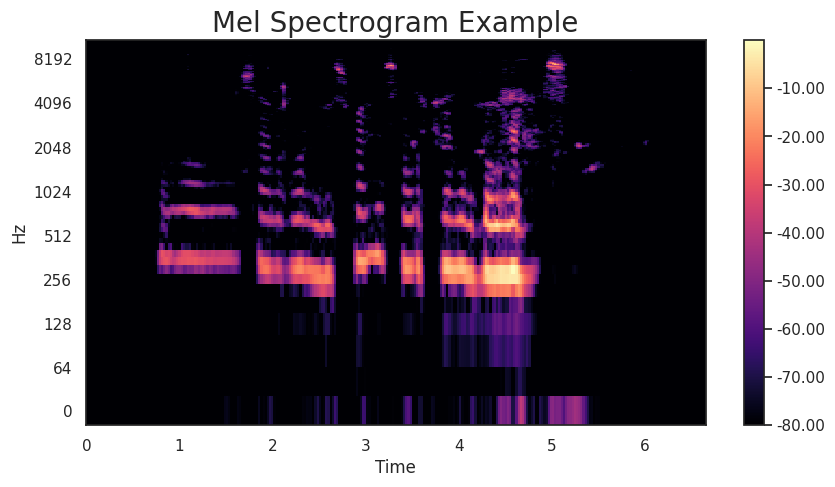

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectrogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()